In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('lianjia.csv')

In [3]:
data.head(5)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


### 查找哪列存在缺失值

In [4]:
data.isnull().any()

Direction     False
District      False
Elevator       True
Floor         False
Garden        False
Id            False
Layout        False
Price         False
Region        False
Renovation    False
Size          False
Year          False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


### 查看数据概述，大致了解是否存在异常值

In [6]:
data.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


### 增加单价列

In [7]:
data['avgprice']=data['Price']/data['Size']

### 修改列名、列顺序
修改列名也可以使用`rename(columns={'原列名':'修改列名'})`方法来修改字典中指定的列名，返回一个修改后的DataFrame

In [8]:
# 修改列名
data.columns=['朝向','板块','电梯','楼层','小区','Id','房型','总价','区','装修','面积','年份','单价']
data.head()

,朝向,板块,电梯,楼层,小区,Id,房型,总价,区,装修,面积,年份,单价
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988,10.400000
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988,11.750000
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996,6.666667
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004,10.769231
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010,11.088889


In [9]:
# 修改列顺序
data=data[['区','板块','小区','楼层','单价','面积','总价','房型','装修','年份','朝向','电梯']]
data.head()

,区,板块,小区,楼层,单价,面积,总价,房型,装修,年份,朝向,电梯
0,东城,灯市口,锡拉胡同21号院,6,10.400000,75.0,780.0,3室1厅,精装,1988,东西,NaN
1,东城,东单,东华门大街,6,11.750000,60.0,705.0,2室1厅,精装,1988,南北,无电梯
2,东城,崇文门,新世界中心,16,6.666667,210.0,1400.0,3室1厅,其他,1996,南西,有电梯
3,东城,崇文门,兴隆都市馨园,7,10.769231,39.0,420.0,1室1厅,精装,2004,南,NaN
4,东城,陶然亭,中海紫御公馆,19,11.088889,90.0,998.0,2室2厅,精装,2010,南,有电梯


### 分区分析
分组聚合计算后得到的是一个Series，使用`to_frame()`方法将Series转换为DataFrame，使用`reset_index()`方法重置index索引，`sort_values()`方法进行排序

In [23]:
house_price_mean=data.groupby('区')['单价'].mean().to_frame().reset_index().sort_values('单价',ascending=False)
house_price_mean

,区,单价
12,西城,10.688348
0,东城,9.864243
10,海淀,8.847025
9,朝阳,7.317792
1,丰台,6.098628
11,石景山,5.535677
3,大兴,5.414790
13,通州,5.240839
15,顺义,4.974990
2,亦庄开发区,4.696853


In [31]:
house_count=data.groupby('区')['单价'].count().to_frame().reset_index().sort_values('单价',ascending=False)
house_count.columns=['区','数量']
house_count

,区,数量
10,海淀,2983
9,朝阳,2973
1,丰台,2952
8,昌平,2811
12,西城,2130
3,大兴,2115
13,通州,1602
0,东城,1533
7,房山,1442
15,顺义,1221


### 图表显示

In [36]:
%matplotlib notebookfigsize

<IPython.core.display.Javascript object>


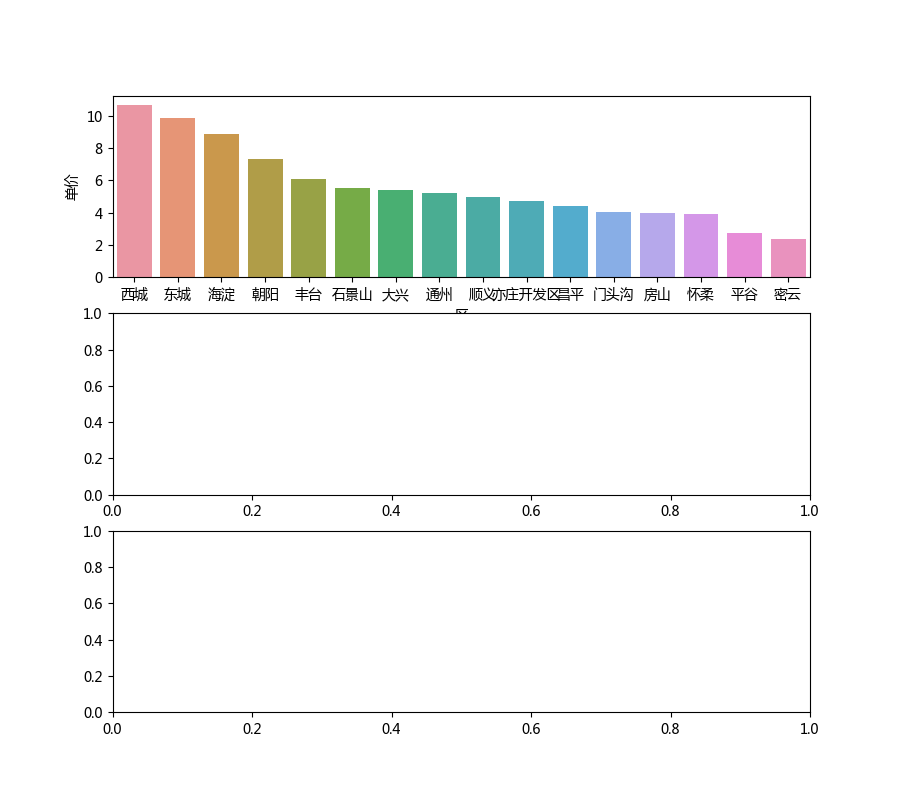

In [50]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(9,8))

In [51]:
sns.barplot(data=house_price_mean,x='区',y='单价',ax=ax1)